In [398]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [399]:
numero_ultimi_giorni_da_considerare = 1000
timeframe = 1
sfasamento_in_timeframe = 0
nome_alt = "TIA"
nome_valuta = "USD"

# Scarica i dati storici di prezzo per Bitcoin e la alt
bitcoin = yf.download(f'BTC-{nome_valuta}', period=f'{numero_ultimi_giorni_da_considerare}d')['Close']
alt = yf.download(f'{nome_alt}-{nome_valuta}', period=f'{numero_ultimi_giorni_da_considerare}d')['Close']

# Raggruppa i dati in intervalli di "timeframe" giorni e calcola il prezzo di chiusura alla fine di ogni "timeframe" giorni
bitcoin_resampled = bitcoin.resample(f'{timeframe}D').last()
alt_resampled = alt.resample(f'{timeframe}D').last()

# Sfaso il prezzo di chiusura della alt di sfasamento_in_timeframe
alt_resampled = alt_resampled.shift(sfasamento_in_timeframe)

# Calcola le variazioni percentuali sui dati
bitcoin_returns = bitcoin_resampled.pct_change()
alt_returns = alt_resampled.pct_change()

# Crea un DataFrame per confrontare le variazioni di prezzo
data_variations = pd.DataFrame({
    'BTC': bitcoin_returns,
    nome_alt: alt_returns
})

# Calcola il numero di settimane in cui le due criptovalute hanno avuto comportamenti opposti
opposite_weeks = ((data_variations[nome_alt] > 0) & (data_variations['BTC'] < 0)) | ((data_variations[nome_alt] < 0) & (data_variations['BTC'] > 0))

# Calcola il rischio come percentuale di settimane con comportamenti opposti
risk = opposite_weeks.sum() / len(data_variations) * 100

print(f"Il rischio di {nome_alt} rispetto a BTC col mio metodo è del {round(risk,2)}%")
# print(f'Il rischio di {nome_alt} rispetto a BTC in base alla correlazione di Pearson è del {round(100 - matrice_correlazioni_pearson.iloc[0][1]*100,2)}%')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Il rischio di TIA rispetto a BTC col mio metodo è del 35.5%


In [410]:
df_prezzi = pd.DataFrame({f'BTC': bitcoin_resampled, nome_alt: alt_resampled})
df_prezzi[-70:-40]

,BTC,TIA
Date,,
2024-03-02,62029.847656,0.010326
2024-03-03,63167.371094,0.005889
2024-03-04,68330.414062,0.007506
2024-03-05,63801.199219,0.005572
2024-03-06,66106.804688,0.008702
2024-03-07,66925.484375,0.007607
2024-03-08,68300.093750,0.008350
2024-03-09,68498.882812,0.005497
2024-03-10,69019.789062,0.007159


In [401]:
matrice_correlazioni_pearson = df_prezzi.corr()
matrice_correlazioni_pearson

,BTC,TIA
BTC,1.000000,0.101775
TIA,0.101775,1.000000


In [402]:
data_variations

,BTC,TIA
Date,,
2021-08-15,NaN,NaN
2021-08-16,-0.022159,NaN
2021-08-17,-0.028456,NaN
2021-08-18,0.002368,NaN
2021-08-19,0.042775,NaN
...,...,...
2024-05-06,-0.013574,0.546051
2024-05-07,-0.013095,-0.372371
2024-05-08,-0.018399,-0.031567


In [403]:
data_variations[data_variations[nome_alt].isna()]

,BTC,TIA
Date,,
2021-08-15,NaN,NaN
2021-08-16,-0.022159,NaN
2021-08-17,-0.028456,NaN
2021-08-18,0.002368,NaN
2021-08-19,0.042775,NaN
...,...,...
2022-02-24,0.027778,NaN
2022-02-25,0.022999,NaN
2022-02-26,-0.002781,NaN


In [404]:
data_variations[data_variations[nome_alt].notna()]

,BTC,TIA
Date,,
2022-03-01,0.026889,-0.453264
2022-03-02,-0.009706,0.264396
2022-03-03,-0.033520,-0.073315
2022-03-04,-0.078069,-0.134896
2022-03-05,0.006719,-0.007083
...,...,...
2024-05-06,-0.013574,0.546051
2024-05-07,-0.013095,-0.372371
2024-05-08,-0.018399,-0.031567


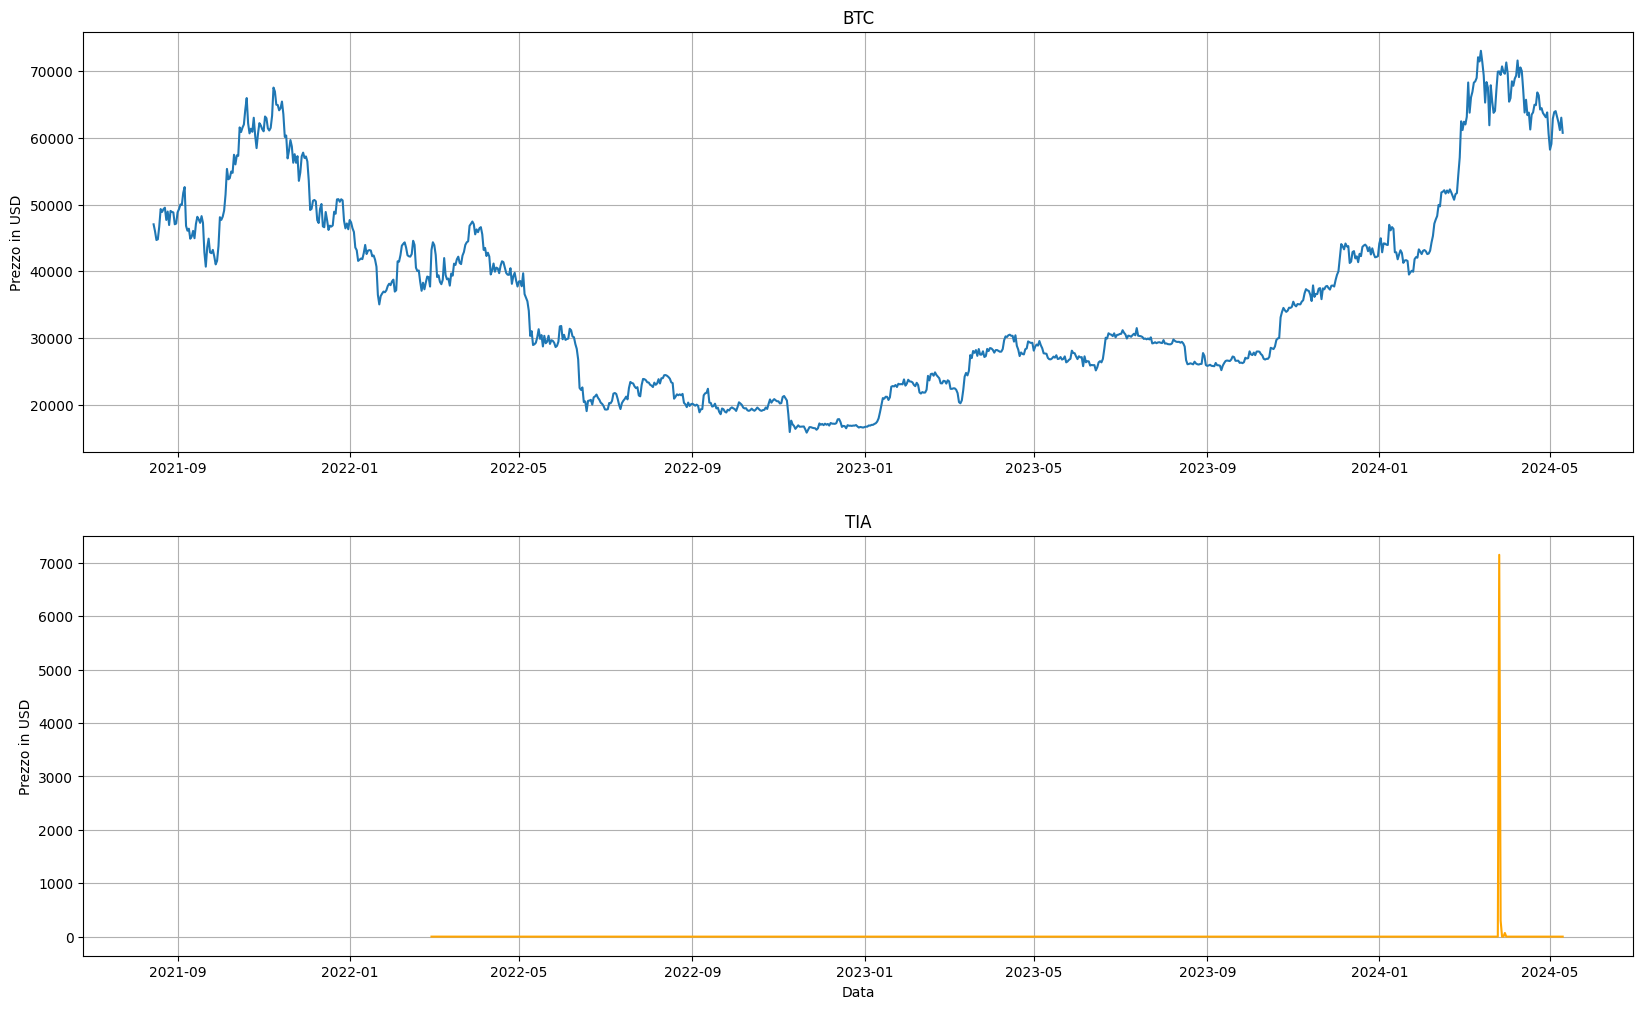

In [405]:
fig, axs = plt.subplots(2, figsize=(20, 12))  # Crea una figura con 2 subplot

# Grafico per BTC
axs[0].plot(df_prezzi.index, df_prezzi['BTC'], label='BTC')
axs[0].set_title('BTC')
axs[0].set_ylabel(f'Prezzo in {nome_valuta}')
axs[0].grid()

# Grafico scatter per IMX
axs[1].plot(df_prezzi.index, df_prezzi[nome_alt], label=nome_alt, color='orange')
axs[1].set_title(nome_alt)
axs[1].set_xlabel('Data')
axs[1].set_ylabel(f'Prezzo in {nome_valuta}')
axs[1].grid()
axs[1].set_xlim(axs[0].get_xlim())

# plt.tight_layout()  # Assicura che ci sia spazio sufficiente tra i subplot
plt.show()

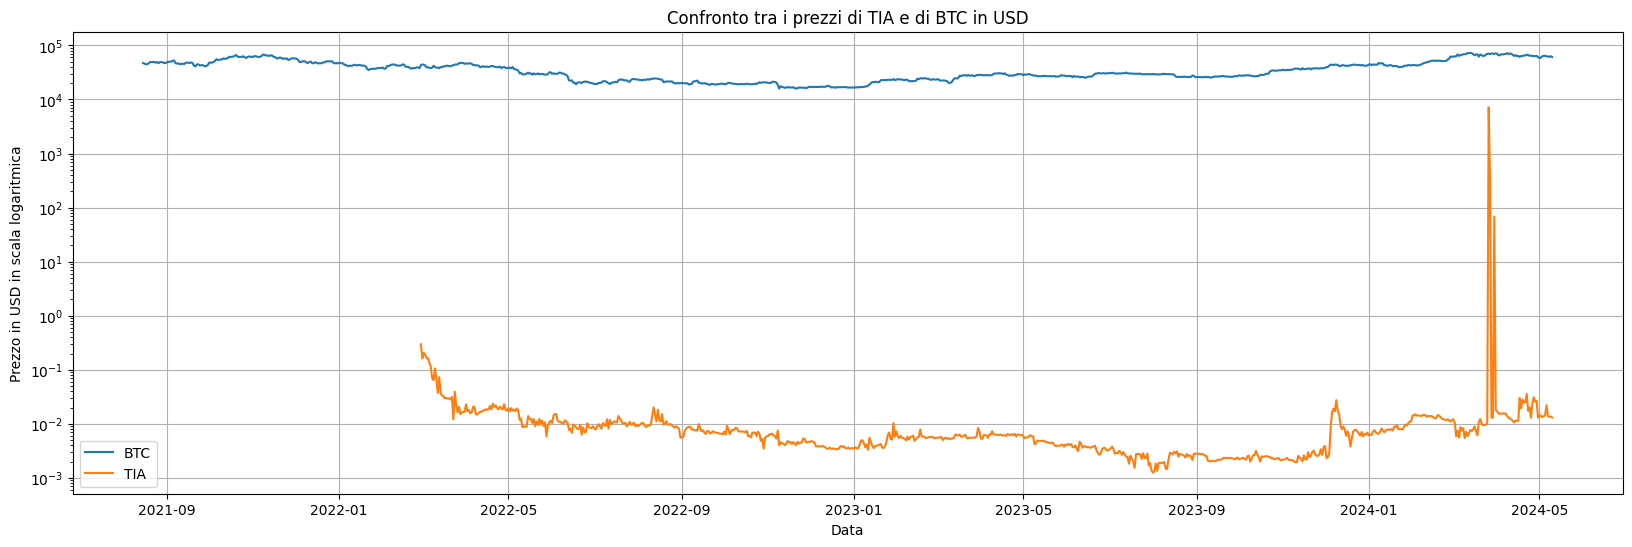

In [406]:
# Grafici dei prezzi delle 2 crypto a confronto in un unico grafico con scala logaritmica sull'asse y

plt.figure(figsize=(20, 6))
plt.plot(df_prezzi.index, df_prezzi['BTC'], label='BTC')
valori_mancanti_alt = df_prezzi[nome_alt].isna().sum()
plt.plot(df_prezzi.index, df_prezzi[nome_alt], label=nome_alt)
plt.legend()
plt.title(f'Confronto tra i prezzi di {nome_alt} e di BTC in {nome_valuta}')
plt.xlabel('Data')
plt.ylabel(f'Prezzo in {nome_valuta} in scala logaritmica')
plt.grid()
plt.yscale('log')
plt.show()

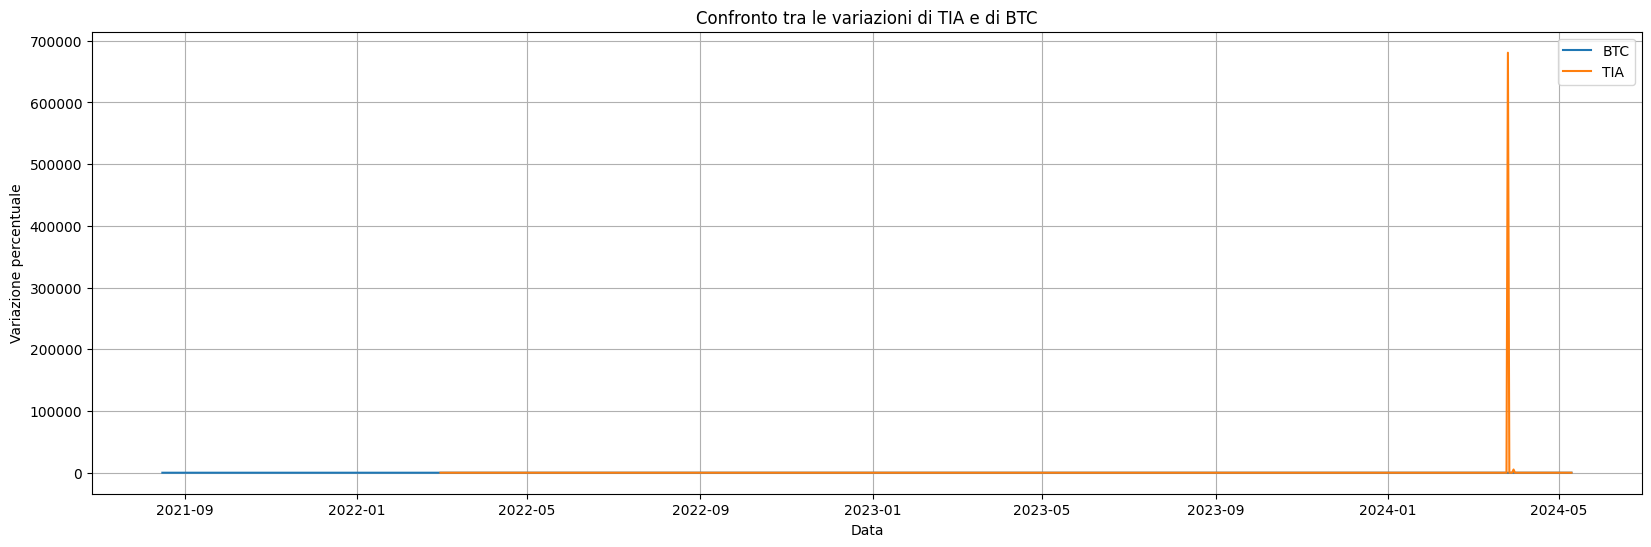

In [407]:
plt.figure(figsize=(20, 6))
plt.plot(data_variations.index, data_variations['BTC'], label='BTC')
plt.plot(data_variations.index, data_variations[nome_alt], label=nome_alt)
plt.legend()
plt.title(f'Confronto tra le variazioni di {nome_alt} e di BTC')
plt.xlabel('Data')
plt.ylabel('Variazione percentuale')
plt.grid()
# plt.yscale('log')
plt.show()